# Nutrition Table Clean UP

## Set up

In [16]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from zipfile import ZipFile
import os
import seaborn as sns

pd.options.mode.chained_assignment = None

In [17]:
# unzipping survey tables

# specifying location of .zip and extraction location
sur_B_path="/home/rthoms/ocean_dep/sur_B/raw_data/Sur_B_03072023.zip"
sur_B_raw="/home/rthoms/ocean_dep/sur_B/raw_data/sur_B_raw"

# loading the .zip and creating a zip object
with ZipFile(sur_B_path, 'r') as zObject:

	# Extracting all the members of the zip
	# into a the specified location.
	zObject.extractall(
		path=sur_B_raw)

In [18]:
# specifiy location of raw data
# main survey table
df_main = pd.read_csv("/home/rthoms/ocean_dep/sur_B/clean_up/survey_main_table_clean.csv")

# specifiy location of raw data
# main survey table
ss_raw = os.path.join(sur_B_raw, "Form_4_0.csv")
df_ss = pd.read_csv(ss_raw)

# practice table
prac_raw = os.path.join(sur_B_raw, "fish_pract_table_1.csv")
df_prac = pd.read_csv(prac_raw, na_values='na')

# nutrition resource table
nut_raw = os.path.join(sur_B_raw, "nutrition_sources_table_4.csv")
df_nut = pd.read_csv(nut_raw, dtype={'nutrition_source': object})

In [19]:
# Drop any duplicates in practice categories (i.e. a fisher who fishes using 2 gear types)
df_main = df_main.drop_duplicates(
    subset = ['ParentGlobalID', 'pract_cat'],
    keep = 'first').reset_index(drop = True)
df_main

,Unnamed: 0,ParentGlobalID,id,ccp,gender,fish_pract,owner,catch_proportion,pract_cat
0,0,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,13022023NHAMUB02,nhamua,f,glean,NaN,1.00,glean
1,1,3f3b6da1-f4ee-467b-9647-aefe9851351f,16022023NHMUB05,nhamua,f,glean,NaN,1.00,glean
2,2,8b4320ee-bf8d-4616-b0bc-d8bc33e9cc99,16022023NHMUB07,nhamua,m,gill_net,owner,0.33,fish
3,3,1205bf41-13d7-4421-b564-4a77c527cd17,13022023NHMUB01,nhamua,m,fence_trap,owner,1.00,fish
4,4,310a5eff-b95e-4979-a0dd-c98a7703f436,13022023NHMUB03,nhamua,m,gill_net,NR,0.25,fish
...,...,...,...,...,...,...,...,...,...
118,122,074701a4-86f2-4beb-a67e-b12fc841f7fe,07022023CUGB04,kuguana,f,drag_net,NR,0.33,fish
119,123,368b8b4c-a618-434a-8ebe-7f7fa8c143fc,07022023CUGB05,kuguana,m,drag_net,supervisor,0.24,fish
120,124,454f8afd-86aa-4418-80e3-4e1ccb572b8c,07022023CUGB06,kuguana,m,fence_trap,owner,1.00,fish
121,125,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,07022023CUGB07,kuguana,m,fence_trap,owner,1.00,fish


In [20]:
# species table
species = pd.read_csv("/home/rthoms/ocean_dep/sur_B/clean_up/species.csv", dtype={'resource_id': object})
species.rename(columns={'resource_id':'nutrition_source'}, inplace=True)
df_wk = pd.merge(df_nut,species,on='nutrition_source', how='left')
df_wk

,ObjectID,GlobalID,nutrition_source,_nutrition_source_label,nutrition_prop_hot_raw,nutrition_prop_hot,nutrition_prop_cold_raw,nutrition_prop_cold,ParentGlobalID,CreationDate,...,gitonga_s,gitonga_p,portuguese,scientific,family,phylum,category,focal,communities,seagrass
0,8,356d97d1-fd26-43aa-820e-47af9d5877b6,01,mihili (1),2,0.066667,2,0.066667,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,4/11/2023 6:30:30 AM,...,hili,mihili,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,"ilha,nhamua,josina_machel,chamane,marrambone,m...",0.0
1,9,39b5fafa-e6ab-4102-9ce8-7a4d63e5350c,02,mavionho (2),2,0.066667,2,0.066667,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,4/11/2023 6:30:30 AM,...,livbionho,mavbionho,Melanúria comum,Gerres oyena,Gerreidae,bony fish,fish,1.0,"nhamua,josina_machel,chamane,marrambone,mucucu...",1.0
2,10,af2c21d6-f5de-4dfe-ae45-7aa6e1292502,07,"carapo, tara (7)",2,0.066667,2,0.066667,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,4/11/2023 6:30:30 AM,...,nhambulungue,NaN,carapau,Caranginae,Caranginae,bony fish,fish,1.0,nhamua,0.0
3,11,7dd90b1c-1b00-40c6-a856-0769d36666ac,50,dzindrolo (50),10,0.333333,10,0.333333,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,4/11/2023 6:30:30 AM,...,ndrolo,dzindrolo,Caranguejo,Portunus pelagicus,Portunidae,crustacean,crabs,1.0,"ilha,nhamua,josina_machel,chamane,marrambone,m...",2.0
4,12,d9729ecd-82ee-4d4e-8d5d-219906ab7257,56,mavandzi (56),2,0.066667,2,0.066667,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,4/11/2023 6:30:30 AM,...,lipandzi,mavbandzi,Camarao,Penaeidae,Penaeidae,crustacean,prawns,1.0,"ilha,nhamua,josina_machel,chamane,marrambone,m...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,763,ccb2e2d2-96f4-4ea0-8ddb-8b40b079a00b,50,dzindrolo (50),4,0.133333,4,0.133333,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,7/1/2023 12:17:35 PM,...,ndrolo,dzindrolo,Caranguejo,Portunus pelagicus,Portunidae,crustacean,crabs,1.0,"ilha,nhamua,josina_machel,chamane,marrambone,m...",2.0
728,764,ea28e79c-25c2-455d-9ce6-868ce0be824d,52,gihologo (52),3,0.100000,5,0.166667,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,7/1/2023 12:17:35 PM,...,gihologo,sihologo,Santola,Scylla serrata,Portunidae,crustacean,crabs,1.0,"madava, kuguana, morrumbene",0.0
729,765,95edfc02-dd57-46e1-8072-13bd1f75a708,68,nhanguedwa (68),5,0.166667,11,0.366667,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,7/1/2023 12:17:35 PM,...,nhanguedwa,nhanguedwa,canivetes,Solenidae,Solenidae,mollusc,bivalve,1.0,"madava,kuguana,morrumbene",0.0
730,766,ef963aa5-7eec-4f4d-a447-382071364c72,78,togoma (78),4,0.133333,5,0.166667,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,7/1/2023 12:17:35 PM,...,togoma,dzitogoma,Caracóis,Volema pyrum,Melongenidae,mollusc,gastropod,1.0,"mucucune,nhampossa,madava,kuguana",1.0


In [21]:
# seagrass dependence from survey C
sg_dep = pd.read_csv("/home/rthoms/ocean_dep/sur_A/sg_dep.csv", dtype={'focal_resource': object})
sg_dep.rename(columns={'focal_resource':'nutrition_source'}, inplace=True)
df_wk = pd.merge(df_wk,sg_dep,on='nutrition_source', how='left')
df_wk

,ObjectID,GlobalID,nutrition_source,_nutrition_source_label,nutrition_prop_hot_raw,nutrition_prop_hot,nutrition_prop_cold_raw,nutrition_prop_cold,ParentGlobalID,CreationDate,...,category,focal,communities,seagrass,Unnamed: 0,sg_dep_median,mode,sg_dep_rescaled,sg_dep_reclass,sg_dep_cat
0,8,356d97d1-fd26-43aa-820e-47af9d5877b6,01,mihili (1),2,0.066667,2,0.066667,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,4/11/2023 6:30:30 AM,...,fish,1.0,"ilha,nhamua,josina_machel,chamane,marrambone,m...",0.0,0.0,0.0,0.0,0.0,0.0,none
1,9,39b5fafa-e6ab-4102-9ce8-7a4d63e5350c,02,mavionho (2),2,0.066667,2,0.066667,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,4/11/2023 6:30:30 AM,...,fish,1.0,"nhamua,josina_machel,chamane,marrambone,mucucu...",1.0,1.0,0.0,0.0,0.0,0.0,none
2,10,af2c21d6-f5de-4dfe-ae45-7aa6e1292502,07,"carapo, tara (7)",2,0.066667,2,0.066667,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,4/11/2023 6:30:30 AM,...,fish,1.0,nhamua,0.0,5.0,0.0,0.0,0.0,0.0,none
3,11,7dd90b1c-1b00-40c6-a856-0769d36666ac,50,dzindrolo (50),10,0.333333,10,0.333333,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,4/11/2023 6:30:30 AM,...,crabs,1.0,"ilha,nhamua,josina_machel,chamane,marrambone,m...",2.0,9.0,3.0,3.0,2.0,2.0,high
4,12,d9729ecd-82ee-4d4e-8d5d-219906ab7257,56,mavandzi (56),2,0.066667,2,0.066667,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,4/11/2023 6:30:30 AM,...,prawns,1.0,"ilha,nhamua,josina_machel,chamane,marrambone,m...",1.0,14.0,1.5,3.0,1.0,1.0,mod
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,763,ccb2e2d2-96f4-4ea0-8ddb-8b40b079a00b,50,dzindrolo (50),4,0.133333,4,0.133333,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,7/1/2023 12:17:35 PM,...,crabs,1.0,"ilha,nhamua,josina_machel,chamane,marrambone,m...",2.0,9.0,3.0,3.0,2.0,2.0,high
728,764,ea28e79c-25c2-455d-9ce6-868ce0be824d,52,gihologo (52),3,0.100000,5,0.166667,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,7/1/2023 12:17:35 PM,...,crabs,1.0,"madava, kuguana, morrumbene",0.0,10.0,0.0,0.0,0.0,0.0,none
729,765,95edfc02-dd57-46e1-8072-13bd1f75a708,68,nhanguedwa (68),5,0.166667,11,0.366667,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,7/1/2023 12:17:35 PM,...,bivalve,1.0,"madava,kuguana,morrumbene",0.0,19.0,0.0,0.0,0.0,0.0,none
730,766,ef963aa5-7eec-4f4d-a447-382071364c72,78,togoma (78),4,0.133333,5,0.166667,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,7/1/2023 12:17:35 PM,...,gastropod,1.0,"mucucune,nhampossa,madava,kuguana",1.0,24.0,0.0,0.0,0.0,0.0,none


In [22]:
df_wk = pd.merge(df_wk, df_main, on='ParentGlobalID', how='left')
df_wk

,ObjectID,GlobalID,nutrition_source,_nutrition_source_label,nutrition_prop_hot_raw,nutrition_prop_hot,nutrition_prop_cold_raw,nutrition_prop_cold,ParentGlobalID,CreationDate,...,sg_dep_reclass,sg_dep_cat,Unnamed: 0_y,id,ccp,gender,fish_pract,owner,catch_proportion,pract_cat
0,8,356d97d1-fd26-43aa-820e-47af9d5877b6,01,mihili (1),2,0.066667,2,0.066667,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,4/11/2023 6:30:30 AM,...,0.0,none,0,13022023NHAMUB02,nhamua,f,glean,NaN,1.0,glean
1,9,39b5fafa-e6ab-4102-9ce8-7a4d63e5350c,02,mavionho (2),2,0.066667,2,0.066667,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,4/11/2023 6:30:30 AM,...,0.0,none,0,13022023NHAMUB02,nhamua,f,glean,NaN,1.0,glean
2,10,af2c21d6-f5de-4dfe-ae45-7aa6e1292502,07,"carapo, tara (7)",2,0.066667,2,0.066667,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,4/11/2023 6:30:30 AM,...,0.0,none,0,13022023NHAMUB02,nhamua,f,glean,NaN,1.0,glean
3,11,7dd90b1c-1b00-40c6-a856-0769d36666ac,50,dzindrolo (50),10,0.333333,10,0.333333,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,4/11/2023 6:30:30 AM,...,2.0,high,0,13022023NHAMUB02,nhamua,f,glean,NaN,1.0,glean
4,12,d9729ecd-82ee-4d4e-8d5d-219906ab7257,56,mavandzi (56),2,0.066667,2,0.066667,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,4/11/2023 6:30:30 AM,...,1.0,mod,0,13022023NHAMUB02,nhamua,f,glean,NaN,1.0,glean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,763,ccb2e2d2-96f4-4ea0-8ddb-8b40b079a00b,50,dzindrolo (50),4,0.133333,4,0.133333,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,7/1/2023 12:17:35 PM,...,2.0,high,125,07022023CUGB07,kuguana,m,fence_trap,owner,1.0,fish
895,764,ea28e79c-25c2-455d-9ce6-868ce0be824d,52,gihologo (52),3,0.100000,5,0.166667,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,7/1/2023 12:17:35 PM,...,0.0,none,125,07022023CUGB07,kuguana,m,fence_trap,owner,1.0,fish
896,765,95edfc02-dd57-46e1-8072-13bd1f75a708,68,nhanguedwa (68),5,0.166667,11,0.366667,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,7/1/2023 12:17:35 PM,...,0.0,none,125,07022023CUGB07,kuguana,m,fence_trap,owner,1.0,fish
897,766,ef963aa5-7eec-4f4d-a447-382071364c72,78,togoma (78),4,0.133333,5,0.166667,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,7/1/2023 12:17:35 PM,...,0.0,none,125,07022023CUGB07,kuguana,m,fence_trap,owner,1.0,fish


In [23]:
# Examine only focal resources
df_wk = df_wk[df_wk['focal']== 1]

# Sort by resource id
df_wk.sort_values(by='nutrition_source', ascending=True, inplace=True)

In [24]:
df_wk

,ObjectID,GlobalID,nutrition_source,_nutrition_source_label,nutrition_prop_hot_raw,nutrition_prop_hot,nutrition_prop_cold_raw,nutrition_prop_cold,ParentGlobalID,CreationDate,...,sg_dep_reclass,sg_dep_cat,Unnamed: 0_y,id,ccp,gender,fish_pract,owner,catch_proportion,pract_cat
0,8,356d97d1-fd26-43aa-820e-47af9d5877b6,01,mihili (1),2,0.066667,2,0.066667,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,4/11/2023 6:30:30 AM,...,0.0,none,0,13022023NHAMUB02,nhamua,f,glean,NaN,1.0,glean
426,389,11436699-7691-43a6-9503-b7cff4efcd1c,01,mihili (1),4,0.133333,4,0.133333,caac8748-ebed-413c-a5d2-a635b5bd8932,4/24/2023 12:14:49 PM,...,0.0,none,55,09022023NHMPB04,nhampossa,m,fence_trap,owner,1.0,fish
434,397,3b3099d1-4f7d-4c25-bc66-2f54bbb0508e,01,mihili (1),5,0.166667,3,0.100000,a9325c3b-f81d-431a-9628-6b0b57ede5e3,4/24/2023 12:14:51 PM,...,0.0,none,56,09022023NHMPB05,nhampossa,f,gill_net,owner,1.0,fish
455,412,bb71b9d9-4520-4e22-a80e-e23aee32589c,01,mihili (1),3,0.100000,3,0.100000,be5b94c1-65c2-44dc-af3c-8a0c1f35f055,4/25/2023 2:03:46 PM,...,0.0,none,59,08022023MADB02,madava,m,drag_net,owner,0.5,fish
489,439,6f5160d0-5af5-4c35-9c94-c988fa8b4bb5,01,mihili (1),8,0.266667,8,0.266667,8407b1b2-9c62-4161-a560-a8c8415ca76a,4/25/2023 2:03:55 PM,...,0.0,none,65,08022023MADB06,madava,m,gill_net,owner,0.5,fish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,254,18a4c4a4-904f-4326-a919-dd14b29936ed,78,togoma (78),1,0.033333,1,0.033333,fa135abb-d0cf-4f86-81fa-d786fd8a957a,4/20/2023 10:22:47 AM,...,0.0,none,37,02022023MARB04,marrambone,f,gill_net,owner,1.0,fish
288,254,18a4c4a4-904f-4326-a919-dd14b29936ed,78,togoma (78),1,0.033333,1,0.033333,fa135abb-d0cf-4f86-81fa-d786fd8a957a,4/20/2023 10:22:47 AM,...,0.0,none,36,02022023MARB04,marrambone,f,shrimp_net,owner,1.0,shrimp_net
341,304,e6fda574-e0d1-4016-a9e6-a91be6fbd16d,78,togoma (78),1,0.033333,1,0.033333,b1aecc22-d28c-4728-9c70-966d76a26e88,4/23/2023 7:57:18 PM,...,0.0,none,45,31012023MUB02,mucucune,m,fence_trap,owner,1.0,fish
192,200,94c3c6a7-5d6e-4c26-ac7d-cb0049fed897,78,togoma (78),3,0.100000,5,0.166667,7dc8a846-da63-495f-815e-10c1c4b6720d,4/19/2023 2:33:05 PM,...,0.0,none,22,04022023CHAB04,chamane,f,shrimp_net,owner,1.0,shrimp_net


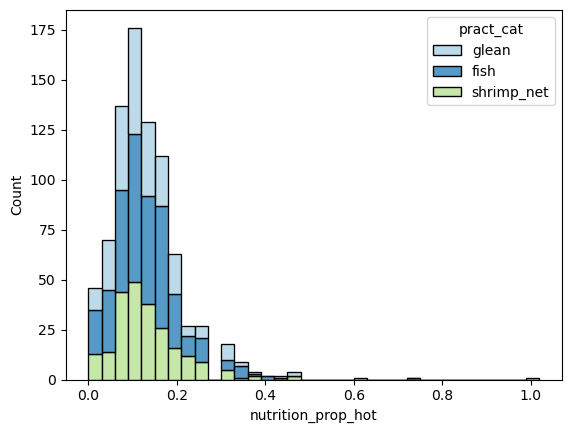

In [25]:
ax = sns.histplot(data=df_wk, stat="count",multiple="stack", x="nutrition_prop_hot", kde=False, palette = "Paired", hue="pract_cat", element="bars",legend=True, binwidth=0.03)

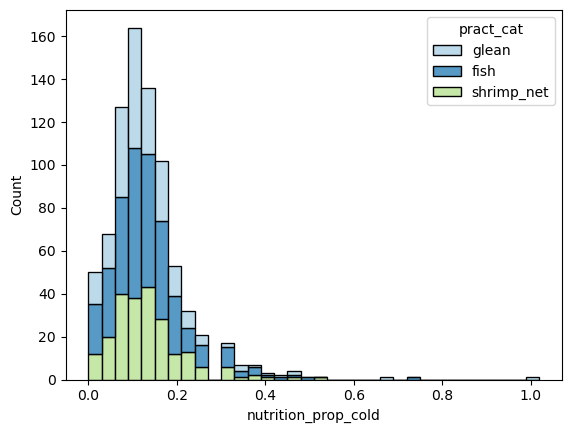

In [26]:

ax = sns.histplot(data=df_wk, stat="count",multiple="stack", x="nutrition_prop_cold", kde=False, palette = "Paired", hue="pract_cat", element="bars",legend=True, binwidth=0.03)

In [27]:
df_ss.columns
df_ss_meat = df_ss[['GlobalID','id', 'ccp','gender','meat_hot_raw', 'meat_hot', 
                    'meat_cold_raw', 'meat_cold','CreationDate']]
df_ss_meat.rename(columns={'GlobalID':'ParentGlobalID'}, inplace=True)
df_ss_meat.rename(columns={'meat_hot_raw':'nutrition_prop_hot_raw'}, inplace=True)
df_ss_meat.rename(columns={'meat_hot':'nutrition_prop_hot'}, inplace=True)
df_ss_meat.rename(columns={'meat_cold_raw':'nutrition_prop_cold_raw'}, inplace=True)
df_ss_meat.rename(columns={'meat_cold':'nutrition_prop_cold'}, inplace=True)
df_ss_meat['nutrition_source'] = '99'
df_ss_meat['scientific'] = 'nonfish_meat'
df_ss_meat['family'] ='nonfish_meat'
df_ss_meat['portuguese'] ='carne'
df_ss_meat['sg_dep_cat'] = 'none'
df_ss_meat['sg_dep_median'] = 0



df_ss_meat


,ParentGlobalID,id,ccp,gender,nutrition_prop_hot_raw,nutrition_prop_hot,nutrition_prop_cold_raw,nutrition_prop_cold,CreationDate,nutrition_source,scientific,family,portuguese,sg_dep_cat,sg_dep_median
0,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,13022023NHAMUB02,nhamua,f,1,0.033333,1,0.033333,4/11/2023 6:30:30 AM,99,nonfish_meat,nonfish_meat,carne,none,0
1,3f3b6da1-f4ee-467b-9647-aefe9851351f,16022023NHMUB05,nhamua,f,0,0.000000,0,0.000000,4/11/2023 1:37:44 PM,99,nonfish_meat,nonfish_meat,carne,none,0
2,8b4320ee-bf8d-4616-b0bc-d8bc33e9cc99,16022023NHMUB07,nhamua,m,0,0.000000,0,0.000000,4/11/2023 2:46:23 PM,99,nonfish_meat,nonfish_meat,carne,none,0
3,1205bf41-13d7-4421-b564-4a77c527cd17,13022023NHMUB01,nhamua,m,2,0.066667,2,0.066667,4/17/2023 7:33:54 AM,99,nonfish_meat,nonfish_meat,carne,none,0
4,310a5eff-b95e-4979-a0dd-c98a7703f436,13022023NHMUB03,nhamua,m,1,0.033333,1,0.033333,4/17/2023 9:04:49 AM,99,nonfish_meat,nonfish_meat,carne,none,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,074701a4-86f2-4beb-a67e-b12fc841f7fe,07022023CUGB04,kuguana,f,6,0.200000,8,0.266667,7/1/2023 12:17:23 PM,99,nonfish_meat,nonfish_meat,carne,none,0
97,368b8b4c-a618-434a-8ebe-7f7fa8c143fc,07022023CUGB05,kuguana,m,3,0.100000,0,0.000000,7/1/2023 12:17:26 PM,99,nonfish_meat,nonfish_meat,carne,none,0
98,454f8afd-86aa-4418-80e3-4e1ccb572b8c,07022023CUGB06,kuguana,m,2,0.066667,2,0.066667,7/1/2023 12:17:30 PM,99,nonfish_meat,nonfish_meat,carne,none,0
99,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,07022023CUGB07,kuguana,m,3,0.100000,0,0.000000,7/1/2023 12:17:35 PM,99,nonfish_meat,nonfish_meat,carne,none,0


In [28]:
df_ss_meat = pd.merge(df_main[['ParentGlobalID', 'fish_pract','pract_cat']],df_ss_meat,on='ParentGlobalID', how='left')
df_ss_meat

,ParentGlobalID,fish_pract,pract_cat,id,ccp,gender,nutrition_prop_hot_raw,nutrition_prop_hot,nutrition_prop_cold_raw,nutrition_prop_cold,CreationDate,nutrition_source,scientific,family,portuguese,sg_dep_cat,sg_dep_median
0,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,glean,glean,13022023NHAMUB02,nhamua,f,1,0.033333,1,0.033333,4/11/2023 6:30:30 AM,99,nonfish_meat,nonfish_meat,carne,none,0
1,3f3b6da1-f4ee-467b-9647-aefe9851351f,glean,glean,16022023NHMUB05,nhamua,f,0,0.000000,0,0.000000,4/11/2023 1:37:44 PM,99,nonfish_meat,nonfish_meat,carne,none,0
2,8b4320ee-bf8d-4616-b0bc-d8bc33e9cc99,gill_net,fish,16022023NHMUB07,nhamua,m,0,0.000000,0,0.000000,4/11/2023 2:46:23 PM,99,nonfish_meat,nonfish_meat,carne,none,0
3,1205bf41-13d7-4421-b564-4a77c527cd17,fence_trap,fish,13022023NHMUB01,nhamua,m,2,0.066667,2,0.066667,4/17/2023 7:33:54 AM,99,nonfish_meat,nonfish_meat,carne,none,0
4,310a5eff-b95e-4979-a0dd-c98a7703f436,gill_net,fish,13022023NHMUB03,nhamua,m,1,0.033333,1,0.033333,4/17/2023 9:04:49 AM,99,nonfish_meat,nonfish_meat,carne,none,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,074701a4-86f2-4beb-a67e-b12fc841f7fe,drag_net,fish,07022023CUGB04,kuguana,f,6,0.200000,8,0.266667,7/1/2023 12:17:23 PM,99,nonfish_meat,nonfish_meat,carne,none,0
119,368b8b4c-a618-434a-8ebe-7f7fa8c143fc,drag_net,fish,07022023CUGB05,kuguana,m,3,0.100000,0,0.000000,7/1/2023 12:17:26 PM,99,nonfish_meat,nonfish_meat,carne,none,0
120,454f8afd-86aa-4418-80e3-4e1ccb572b8c,fence_trap,fish,07022023CUGB06,kuguana,m,2,0.066667,2,0.066667,7/1/2023 12:17:30 PM,99,nonfish_meat,nonfish_meat,carne,none,0
121,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,fence_trap,fish,07022023CUGB07,kuguana,m,3,0.100000,0,0.000000,7/1/2023 12:17:35 PM,99,nonfish_meat,nonfish_meat,carne,none,0


In [29]:
df_wk = pd.concat([df_wk,df_ss_meat])
df_wk

,ObjectID,GlobalID,nutrition_source,_nutrition_source_label,nutrition_prop_hot_raw,nutrition_prop_hot,nutrition_prop_cold_raw,nutrition_prop_cold,ParentGlobalID,CreationDate,...,sg_dep_reclass,sg_dep_cat,Unnamed: 0_y,id,ccp,gender,fish_pract,owner,catch_proportion,pract_cat
0,8.0,356d97d1-fd26-43aa-820e-47af9d5877b6,01,mihili (1),2,0.066667,2,0.066667,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,4/11/2023 6:30:30 AM,...,0.0,none,0.0,13022023NHAMUB02,nhamua,f,glean,NaN,1.0,glean
426,389.0,11436699-7691-43a6-9503-b7cff4efcd1c,01,mihili (1),4,0.133333,4,0.133333,caac8748-ebed-413c-a5d2-a635b5bd8932,4/24/2023 12:14:49 PM,...,0.0,none,55.0,09022023NHMPB04,nhampossa,m,fence_trap,owner,1.0,fish
434,397.0,3b3099d1-4f7d-4c25-bc66-2f54bbb0508e,01,mihili (1),5,0.166667,3,0.100000,a9325c3b-f81d-431a-9628-6b0b57ede5e3,4/24/2023 12:14:51 PM,...,0.0,none,56.0,09022023NHMPB05,nhampossa,f,gill_net,owner,1.0,fish
455,412.0,bb71b9d9-4520-4e22-a80e-e23aee32589c,01,mihili (1),3,0.100000,3,0.100000,be5b94c1-65c2-44dc-af3c-8a0c1f35f055,4/25/2023 2:03:46 PM,...,0.0,none,59.0,08022023MADB02,madava,m,drag_net,owner,0.5,fish
489,439.0,6f5160d0-5af5-4c35-9c94-c988fa8b4bb5,01,mihili (1),8,0.266667,8,0.266667,8407b1b2-9c62-4161-a560-a8c8415ca76a,4/25/2023 2:03:55 PM,...,0.0,none,65.0,08022023MADB06,madava,m,gill_net,owner,0.5,fish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,NaN,NaN,99,NaN,6,0.200000,8,0.266667,074701a4-86f2-4beb-a67e-b12fc841f7fe,7/1/2023 12:17:23 PM,...,NaN,none,NaN,07022023CUGB04,kuguana,f,drag_net,NaN,NaN,fish
119,NaN,NaN,99,NaN,3,0.100000,0,0.000000,368b8b4c-a618-434a-8ebe-7f7fa8c143fc,7/1/2023 12:17:26 PM,...,NaN,none,NaN,07022023CUGB05,kuguana,m,drag_net,NaN,NaN,fish
120,NaN,NaN,99,NaN,2,0.066667,2,0.066667,454f8afd-86aa-4418-80e3-4e1ccb572b8c,7/1/2023 12:17:30 PM,...,NaN,none,NaN,07022023CUGB06,kuguana,m,fence_trap,NaN,NaN,fish
121,NaN,NaN,99,NaN,3,0.100000,0,0.000000,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,7/1/2023 12:17:35 PM,...,NaN,none,NaN,07022023CUGB07,kuguana,m,fence_trap,NaN,NaN,fish


In [30]:
df_final = df_wk[[ 'nutrition_source','gitonga_s',
       'gitonga_p', 'portuguese', 'scientific', 'family', 'phylum', 'category',
       'focal','sg_dep_median', 'sg_dep_cat',
       'nutrition_prop_hot_raw', 'nutrition_prop_hot',
       'nutrition_prop_cold_raw', 'nutrition_prop_cold', 'ParentGlobalID', 'ccp', 
       'gender', 'fish_pract','pract_cat', 'id']]

df_final.to_csv("../nutrition_table_clean.csv")
df_final

,nutrition_source,gitonga_s,gitonga_p,portuguese,scientific,family,phylum,category,focal,sg_dep_median,...,nutrition_prop_hot_raw,nutrition_prop_hot,nutrition_prop_cold_raw,nutrition_prop_cold,ParentGlobalID,ccp,gender,fish_pract,pract_cat,id
0,01,hili,mihili,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,0.0,...,2,0.066667,2,0.066667,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,nhamua,f,glean,glean,13022023NHAMUB02
426,01,hili,mihili,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,0.0,...,4,0.133333,4,0.133333,caac8748-ebed-413c-a5d2-a635b5bd8932,nhampossa,m,fence_trap,fish,09022023NHMPB04
434,01,hili,mihili,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,0.0,...,5,0.166667,3,0.100000,a9325c3b-f81d-431a-9628-6b0b57ede5e3,nhampossa,f,gill_net,fish,09022023NHMPB05
455,01,hili,mihili,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,0.0,...,3,0.100000,3,0.100000,be5b94c1-65c2-44dc-af3c-8a0c1f35f055,madava,m,drag_net,fish,08022023MADB02
489,01,hili,mihili,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,0.0,...,8,0.266667,8,0.266667,8407b1b2-9c62-4161-a560-a8c8415ca76a,madava,m,gill_net,fish,08022023MADB06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,99,NaN,NaN,carne,nonfish_meat,nonfish_meat,NaN,NaN,NaN,0.0,...,6,0.200000,8,0.266667,074701a4-86f2-4beb-a67e-b12fc841f7fe,kuguana,f,drag_net,fish,07022023CUGB04
119,99,NaN,NaN,carne,nonfish_meat,nonfish_meat,NaN,NaN,NaN,0.0,...,3,0.100000,0,0.000000,368b8b4c-a618-434a-8ebe-7f7fa8c143fc,kuguana,m,drag_net,fish,07022023CUGB05
120,99,NaN,NaN,carne,nonfish_meat,nonfish_meat,NaN,NaN,NaN,0.0,...,2,0.066667,2,0.066667,454f8afd-86aa-4418-80e3-4e1ccb572b8c,kuguana,m,fence_trap,fish,07022023CUGB06
121,99,NaN,NaN,carne,nonfish_meat,nonfish_meat,NaN,NaN,NaN,0.0,...,3,0.100000,0,0.000000,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,kuguana,m,fence_trap,fish,07022023CUGB07
